<a href="https://colab.research.google.com/github/kaiocesar/bike-sharing/blob/master/projeto_interativo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df_bikes = pd.read_csv('comp_bikes_mod.csv')

In [4]:
df_bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [6]:
# No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?
df_bikes.shape

(17379, 17)

In [20]:
# Quantos tipos diferentes de dados existem no dataset do desafio?
len(set(df_bikes.dtypes.values))

2

In [0]:
# Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?
nullable_values = df_bikes['temp'].isnull().sum()
(100 * nullable_values) / df_bikes.shape[0]

10.000575407100524

In [65]:
# Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?
df_not_null_dteday = df_bikes[df_bikes['dteday'].isnull() == False]
df_not_null_dteday.shape

(15641, 17)

In [73]:
# Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 

# Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?
# 0.496

# Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?
# 0.122

df_not_null_dteday.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [83]:
# Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?
pd.Series(df_not_null_dteday['season'], dtype='category')


1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
17373    1.0
17374    NaN
17375    1.0
17377    1.0
17378    NaN
Name: season, Length: 15641, dtype: category
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

In [88]:
# Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)
df_not_null_dteday['dteday'][::-1] 
# 2012-12-31

17378    2012-12-31
17377    2012-12-31
17375    2012-12-31
17374    2012-12-31
17373    2012-12-31
            ...    
5        2011-01-01
4        2011-01-01
3        2011-01-01
2        2011-01-01
1        2011-01-01
Name: dteday, Length: 15641, dtype: object

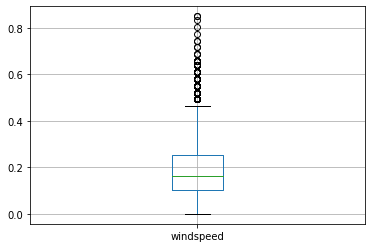

In [93]:
# Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?
df_not_null_dteday.boxplot(column=['windspeed'])
# Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.

In [97]:
# Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". 
# Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:
df_not_null_dteday[['season', 'temp', 'atemp', 'hum', 'windspeed']].corr()

,season,temp,atemp,hum,windspeed
season,1.000000,0.311273,0.319559,0.146984,-0.149802
temp,0.311273,1.000000,0.988102,-0.069887,-0.016022
atemp,0.319559,0.988102,1.000000,-0.054224,-0.058803
hum,0.146984,-0.069887,-0.054224,1.000000,-0.289859
windspeed,-0.149802,-0.016022,-0.058803,-0.289859,1.000000
